# Deep Learning project GAN 

### `import`ant `import`s

In [ ]:
from datetime import date, timedelta
import datetime
import re
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import os
from tensorflow import keras
import tensorflow as tf
import matplotlib


In [ ]:
import pathlib
import time
from IPython import display

### important `constants`

In [ ]:
Domain="https://sdo.gsfc.nasa.gov/assets/img/browse/"
url="https://sdo.gsfc.nasa.gov/assets/img/browse/2019/02/08/"
FILETYPE="4096_HMIB.jpg"
tupel_of_formats=('HMIB.jpg','1600.jpg','1700.jpg')
tupel_of_resolutions=('4096')



### important `functions`

 helps getting the `BeautifulSoup` object of a parsed `html` page. 

In [ ]:

def get_soup(url):
    return bs(requests.get(url).text,'html.parser')


takes a `url` of an `image_link` `str` and downloads it to the directory where the notebook is running

In [ ]:
def download_image(image_link:str, path_location:str,name_of_file:str)->None:
    with open(os.paths.join(path_location,name_of_file),'wb') as file:
        response=requests.get(image_link)
        file.write(response.content)


function to give `date` range between two dates

In [ ]:

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

 Function to download images of `.jpg` from a specific `url`

function to make a `list` of `dates` between any two specific `dates`

`list_of_dates` is a `str` object that has the structure: `yyyy/mm/dd`

In [ ]:
start_date = date(2015, 5, 26)
end_date = date(2021, 11, 29)
list_of_dates=[]
for single_date in daterange(start_date, end_date):
    list_of_dates.append(single_date.strftime("%Y/%m/%d"))
#fifth_daylist=list(daterange(date(2014,12,31),date(2021,11,30)))
#lst1 = [fifth_daylist[i] for i in range(0, len(fifth_daylist), 27)]



In [ ]:
#fifth_daylist=list(daterange(date(2014,12,31),date(2021,11,30)))
'''list_of_every_27_th_day = [list_of_dates[i] for i in range(0, len(list_of_dates), 54)]
print(list_of_every_27_th_day)'''


'list_of_every_27_th_day = [list_of_dates[i] for i in range(0, len(list_of_dates), 54)]\nprint(list_of_every_27_th_day)'

>create a table of type: `pandas.DataFrame` to order the images and see the type, the resolution, and the timestamp

-`string = 20140505_000000_1024_HMIB.jpg `

-`string[:8]=20140505`

-`string[9:15]=000000`

-`string[16:20]=1024`

-`string[21:25]=HMIB`

-In this step, we take a look on some aspects of the potential dataset of images that we'll be using for our model. <br>
-Organizing the names of the images helps to take a better look at some of the important details of the images. <br>
-it's a good thing to have informations such as `"Date Stamp", "Time Stamp", "Resolution", "Format"` of the image in the title. <br>

In [ ]:
for element in get_soup(Domain):
  print(element)


In [ ]:
s=re.compile(r'\b(19[89][0-9]|20[0-4][0-9]|2050)\b')

re.compile(r'\b(19[89][0-9]|20[0-4][0-9]|2050)\b', re.UNICODE)

In [ ]:
df1=pd.DataFrame(columns=["Date Stamp","Time Stamp","Resolution","Format","URL"])
list_of_urls_with_of_days_with_data=[]
for link in get_soup(Domain).find_all('a'):
    child_link=link.get('href')
    #print(child_link)
    if re.search("^20[1-2][0-9][/]$",child_link):
      #python bug instead of * [a-zA-Z0-9]* biliz fix fast
      path_with_year=os.path.join(Domain,child_link)
      for second_link in get_soup(path_with_year).find_all('a'):
            second_child_link=second_link.get('href')
            if re.search("^[0-1][0-9][/]",second_child_link):
              path_with_month=os.path.join(path_with_year,second_child_link)
              for third_link in get_soup(path_with_month).find_all('a'):
                third_child_link=third_link.get('href')
                if re.search("^[0-3][0-9][/]$",third_child_link):
                  path_with_day=os.path.join(path_with_month,third_child_link)
                  list_of_urls_with_of_days_with_data.append(path_with_day)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_drive_directory=r"/content/drive/MyDrive/ML_project_Abschluss-1/ML_project_Abschluss"
list_of_urls_with_of_days_with_data_file_name="all_days_with_data_file.txt"


In [ ]:
import pickle

In [ ]:
all_days_with_data_file=os.path.join(path_to_drive_directory,list_of_urls_with_of_days_with_data_file_name)


In [ ]:
with open(all_days_with_data_file,"w") as f:
  for s in list_of_urls_with_of_days_with_data:
    f.write(str(s)+"\n")

if already available, just read it

In [ ]:
list_of_urls_with_of_days_with_data=[]
with open(all_days_with_data_file,"r") as f:
  for line in f:
    list_of_urls_with_of_days_with_data.append(line.strip())

In [ ]:
len(list_of_urls_with_of_days_with_data)

4649

In [ ]:
df=pd.DataFrame(columns=["Date Stamp","Time Stamp","Resolution","Format","URL"])
#20140505_000000_1024_HMIBC.jpg 

for link in get_soup(url).find_all('a'):
    image_link=link.get('href')
    if image_link.endswith(("512","1024","2048","4096")):
        datestamp=image_link[:4]+"-"+image_link[4:6]+"-"+image_link[6:8]
        timestamp=image_link[9:11]+":"+image_link[11:13]+":"+image_link[13:15]
        if image_link[16:19]in("512","256"):
            pass
        else:
            resolution=image_link[16:20]
            format=image_link[21:25]
        data_line={"Date Stamp":datestamp, "Time Stamp":timestamp, "Resolution":resolution,"Format":format,"URL":url+image_link}
        #print(data_line)
        df=df.append(data_line, ignore_index=True)
        #freq[image_link[15:]] = freq.setdefault(image_link[15:], 0) + 1
        
print(df)

Empty DataFrame
Columns: [Date Stamp, Time Stamp, Resolution, Format, URL]
Index: []


In [ ]:
df.to_excel("2019-02-08_data_frame_standard_date_and_time.xlsx",index=False)

here, we have a list of names of the potential dataset images that we will be using. 
>#### this step filters the images to one set of images every 27 day for the last 11 years. 

In [ ]:
len(list_of_urls_with_of_days_with_data)

4649

In [ ]:
path_to_drive_directory=r"/content/drive/MyDrive/ML_project_Abschluss-1/ML_project_Abschluss"
list_of_512_1600_ulrls_file_name="list_of_512_1600_ulrls.txt"
list_of_HMIB_ulrls_file_name="list_of_512_HMIB_ulrls.txt"

list_of_512_1600_ulrls_file=os.path.join(path_to_drive_directory,list_of_512_1600_ulrls_file_name)
list_of_512_HMIB_ulrls_file=os.path.join(path_to_drive_directory,list_of_HMIB_ulrls_file_name)


In [ ]:
list_of_512_1600_ulrls=[]
list_of_512_HMIB_ulrls=[]

In [ ]:
FILETYPE_1600='AIA_1600'
FILETYPE_HMI='HMI'
list_of_512_1600_ulrls=[]
list_of_512_HMIB_ulrls=[]
i=0
for url_of_day in list_of_urls_with_of_days_with_data[1500:3000]:
  #before index number 87, 2010/07/01, there are no HMIB records
    im_1600=False
    im_HMI=False
    #print(url_of_day)
    for element in get_soup(url_of_day)('a'):
      #print(element.get('href'))
      if (im_1600 ==True and im_HMI==True):
        continue
      if (not element.get('href').endswith('512_1600.jpg'))and(not element.get('href').endswith('512_HMIB.jpg')):
        continue 
      elif im_1600==False and (element.get('href').endswith('512_1600.jpg')) :
        #print(os.path.join(url_of_day,element.get('href')))
        #list_of_512_1600_ulrls.append(os.path.join(url_of_day,element.get('href')))
        with open(list_of_512_1600_ulrls_file,"a") as f:
          f.write(str(os.path.join(url_of_day,element.get('href')))+"\n")
        im_1600=True
        #print(os.path.join(url_of_day,element.get('href')))
        continue
      elif im_HMI==False and (element.get('href').endswith('512_HMIB.jpg')):
        #list_of_512_HMIB_ulrls.append(os.path.join(url_of_day,element.get('href')))
        with open(list_of_512_HMIB_ulrls_file,"a") as f:
          f.write(str(os.path.join(url_of_day,element.get('href')))+"\n")
        im_HMI=True
        print(os.path.join(url_of_day,element.get('href')))


In [ ]:
list_of_urls_with_of_days_with_data[1500:3000]

'https://sdo.gsfc.nasa.gov/assets/img/browse/2014/05/18/'

In [ ]:
'''with open(list_of_512_1600_ulrls_file,"w") as f:
  for s in list_of_512_1600_ulrls:
    f.write(str(s)+"\n")'''

In [ ]:
'''with open(list_of_512_HMIB_ulrls_file,"w") as f:
  for s in list_of_512_HMIB_ulrls:
    f.write(str(s)+"\n")'''

In [ ]:
with open(list_of_512_1600_ulrls_file,"r") as f:
  for line in f:
    list_of_512_1600_ulrls.append(line.strip())
len(list_of_512_1600_ulrls)

4341

In [ ]:
with open(list_of_512_HMIB_ulrls_file,"r") as f:
  for line in f:
    list_of_512_HMIB_ulrls.append(line.strip())


In [ ]:
len(list_of_512_HMIB_ulrls)

4343

In [ ]:
list_of_512_HMIB_ulrls[0][55:63]

'20100627'

In [ ]:
path_of_storing_512=os.path.join(path_to_drive_directory,'512_images')
path_of_storing_aia=os.path.join(path_of_storing_512,'aia 1600')
path_of_storing_hmib=os.path.join(path_of_storing_512,'hmib')

In [ ]:
list_of_1600_with_a_match=[]
list_of_HMIB_with_a_match=[]

In [ ]:
df_matches_1600_hmib_512=pd.DataFrame(columns=["Date Stamp","HMIB","AIA 1600"])


In [ ]:
for i1600 in list_of_512_1600_ulrls:
  for ihmib in list_of_512_HMIB_ulrls:
    if i1600[55:63]==ihmib[55:63]:
      list_of_1600_with_a_match.append(i1600)
      list_of_HMIB_with_a_match.append(ihmib)
      data_line_matching={"Date Stamp":ihmib[55:63], "HMIB":ihmib, "AIA 1600":i1600}
      df_matches_1600_hmib_512=df_matches_1600_hmib_512.append(data_line_matching, ignore_index=True)


In [ ]:
df_matches_1600_hmib_512

In [ ]:
df_matches_1600_hmib_512.to_csv(os.path.join(path_to_drive_directory,"df_matches_1600_hmib_512.csv"),index=False)

In [ ]:
path_of_storing_512

'/content/drive/MyDrive/DeepLearning/ML_project_Abschluss/512_images'

In [ ]:
directories=[path_of_storing_aia,path_of_storing_hmib]

In [ ]:
for i in directories:
    if not os.path.isdir(i):
        os.makedirs(i)

In [ ]:
import urllib

In [ ]:
#urllib.request.urlretrieve(image_url, save_name)
for index,row in df_matches_1600_hmib_512.iterrows():
  urllib.request.urlretrieve(row['AIA 1600'], os.path.join(path_of_storing_aia,row['Date Stamp']+'.jpg'))
  urllib.request.urlretrieve(row['HMIB'], os.path.join(path_of_storing_hmib,row['Date Stamp']+'.jpg'))


In [ ]:
path_to_drive_directory=r"/content/drive/MyDrive/ML_project_Abschluss-1/ML_project_Abschluss"
path_of_storing_512=os.path.join(path_to_drive_directory,'512_images')



In [ ]:
path_to_zip  = pathlib.Path(path_of_storing_512)

PATH = path_to_zip.parent/dataset_name

In [ ]:
path_of_storing_512=os.path.join(path_to_drive_directory,'512_images')
path_of_storing_aia=os.path.join(path_of_storing_512,'aia 1600')
path_of_storing_hmib=os.path.join(path_of_storing_512,'hmib')

In [ ]:
def load(input_image_file,real_image_file):
  # Read and decode an image file to a uint8 tensor
  input_image = tf.io.read_file(input_image_file)
  input_de_image = tf.io.decode_jpeg(input_image)
  corped_input_image=input_de_image[51:461,51:461]
  # [51:461,51:461]
  real_image = tf.io.read_file(real_image_file)
  real_de_image = tf.io.decode_jpeg(real_image)
  corped_real_image=real_de_image[13:499,13:499]
  # [13:499,13:499]
  # Convert both images to float32 tensors
  #input_image = tf.cast(input_image, tf.float32)
  input_T_image = tf.cast(corped_input_image, tf.float32)
  real_T_image = tf.cast(corped_real_image, tf.float32)
  #convert tf.image.grayscale_to_rgb(input_image)
  #input_rgb_T_image=tf.image.grayscale_to_rgb(input_T_image)/255.0

  return input_T_image,real_T_image


In [ ]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [ ]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [ ]:
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [ ]:
def my_random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [ ]:
real_image,input_image=load(os.path.join(path_of_storing_aia,'train/20170501.jpg'),os.path.join(path_of_storing_hmib,'train/20170501.jpg'))


In [ ]:
input_image.shape

TensorShape([486, 486, 1])

In [ ]:
real_image.shape

TensorShape([410, 410, 3])

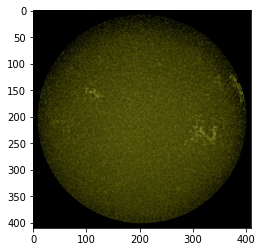

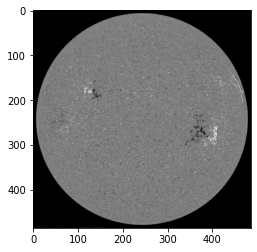

In [ ]:
plt.figure()
plt.imshow(real_image/255.0)
plt.figure()
rgb_input_image=tf.image.grayscale_to_rgb(input_image)

plt.imshow(rgb_input_image/255.0)

In [ ]:
real_image.shape

TensorShape([410, 410, 3])

In [ ]:
input_image.shape

TensorShape([486, 486, 1])

In [ ]:
rgb_input_image.shape

TensorShape([486, 486, 3])

In [ ]:
#512 * 512 ----> 390*390 aia 1600 
#       [51:461,51:461]
#512 * 512 ----> 470*470 hmib
#       [13:499,13:499]


In [ ]:
BUFFER_SIZE = 1000
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
input_image,real_image=resize(input_image,real_image,IMG_HEIGHT,IMG_WIDTH)

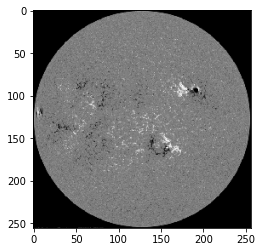

In [ ]:
plt.figure()
rgb_input_image=tf.image.grayscale_to_rgb(input_image)
plt.imshow(rgb_input_image/255.0)

In [ ]:
rj_inp, rj_re= random_jitter(rgb_input_image,real_image)

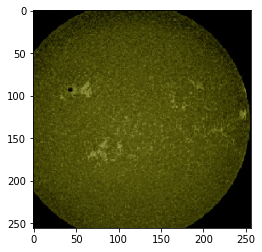

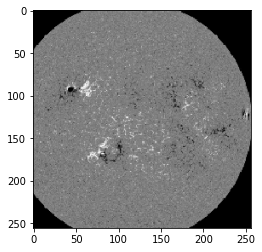

In [ ]:
plt.figure()
plt.imshow(rj_re/255.0)
plt.figure()
plt.imshow(rj_inp/255.0)

In [ ]:
def load_image_train(input_image_file,real_image_file):
  input_image,real_image=load(input_image_file,real_image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
while True:
  pass

In [ ]:
def load_image(input_image_file,real_image_file):
  # Read and decode an image file to a uint8 tensor
  input_image = tf.io.read_file(input_image_file)
  input_de_image = tf.io.decode_jpeg(input_image)
  corped_input_image=input_de_image[51:461,51:461]
  # [51:461,51:461]
  real_image = tf.io.read_file(real_image_file)
  real_de_image = tf.io.decode_jpeg(real_image)
  corped_real_image=real_de_image[13:499,13:499]
  # [13:499,13:499]
  # Convert both images to float32 tensors
  #input_image = tf.cast(input_image, tf.float32)
  input_T_image = tf.cast(corped_input_image, tf.float32)
  real_T_image = tf.cast(corped_real_image, tf.float32)
  #convert tf.image.grayscale_to_rgb(input_image)
  #input_rgb_T_image=tf.image.grayscale_to_rgb(input_T_image)/255.0
  #input_image,real_image=load(input_image_file,real_image_file)
  plt.figure()
  plt.imshow(real_T_image/255.0)
  plt.figure()
  rgb_h_input_image=tf.image.grayscale_to_rgb(input_T_image)
  plt.imshow(rgb_h_input_image/255.0)
  ##resize
  input_image, real_image=resize(input_T_image, real_T_image,IMG_HEIGHT, IMG_WIDTH)
  plt.figure()
  plt.imshow(real_image/255.0)
  plt.figure()
  rgb_h_input_image=tf.image.grayscale_to_rgb(input_image)
  plt.imshow(rgb_h_input_image/255.0)
  input_image, real_image = normalize(input_image, real_image)
  plt.figure()
  plt.imshow(real_image/255.0)
  plt.figure()
  rgb_h_input_image=tf.image.grayscale_to_rgb(input_image)
  plt.imshow(rgb_h_input_image/255.0)
  return input_image, real_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


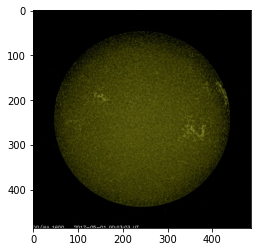

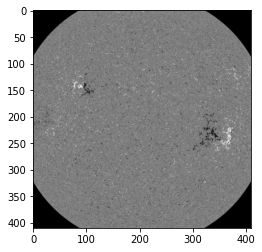

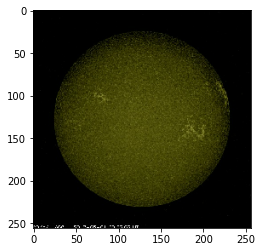

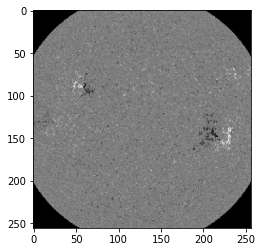

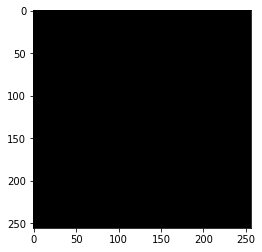

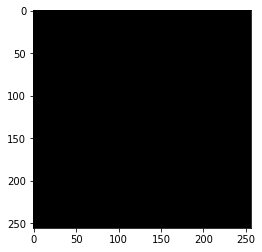

In [ ]:
h_input_image,h_real_image=load_image(os.path.join(path_of_storing_hmib,'train/20170501.jpg'),os.path.join(path_of_storing_aia,'train/20170501.jpg'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


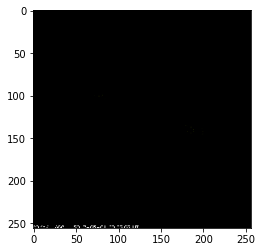

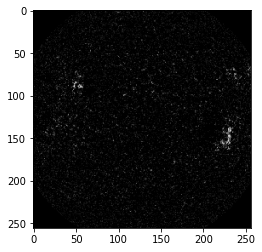

In [ ]:
plt.figure()
plt.imshow(h_real_image)
plt.figure()
rgb_h_input_image=tf.image.grayscale_to_rgb(h_input_image)
plt.imshow(rgb_h_input_image)